In [36]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [ ]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns

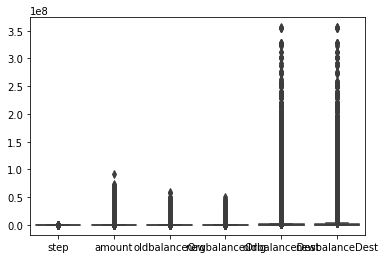

In [41]:
#reading the dataset
txsn_dataset = pd.read_csv("Fraud.csv")

#handling outliers
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
sns.boxplot(data=txsn_dataset[numerical_features])
Q1 = txsn_dataset[numerical_features].quantile(0.25)
Q3 = txsn_dataset[numerical_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

txsn_dataset = txsn_dataset[~((txsn_dataset[numerical_features] < lower_bound) | (txsn_dataset[numerical_features] > upper_bound)).any(axis=1)]

# Calculate z-scores
z_scores = np.abs((txsn_dataset[numerical_features] - txsn_dataset[numerical_features].mean()) / txsn_dataset[numerical_features].std())

# Set a z-score threshold (e.g., ±3)
z_threshold = 3

# Filter outliers
outliers = (z_scores > z_threshold).any(axis=1)
cleaned_dataset = txsn_dataset[~outliers]

#separating the dependent and independent variables

indep_var = cleaned_dataset.iloc[:, :-2].values  # Excluding the last two columns
dep_var = cleaned_dataset.iloc[:, -2].values     # Keeping only the "isFraud" column


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1, 3, 6])],
    remainder="passthrough"
)

# Apply the transformation to your data and get the result
indep_var_encoded = ct.fit_transform(indep_var)


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(indep_var_encoded, dep_var, test_size=0.2, random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#model building 
model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
model.fit(x_train, y_train)




In [ ]:
#make predictions
y_pred = model.predict(x_test)

# Display the predicted values
print("Predicted labels for the test set:", y_pred)

